In [1]:
import pandas as pd
import numpy as np


C:\Users\sivap\AppData\Local\Temp\ipykernel_24996\2937650959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_walmart=pd.read_csv(r"C:\Users\sivap\Downloads\archive\Walmart Data Analysis and Forcasting.csv")


In [3]:
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df=df_walmart[['Store','Date', 'Weekly_Sales']]
df=df.loc[df['Store']==14]
df.shape

(143, 3)

In [5]:
df=df[['Date','Weekly_Sales']]
df.tail()


,Date,Weekly_Sales
1997,28-09-2012,1522512.20
1998,05-10-2012,1687592.16
1999,12-10-2012,1639585.61
2000,19-10-2012,1590274.72
2001,26-10-2012,1704357.62


In [6]:
df.shape

(143, 2)

In [7]:
df.columns=['ds', 'y']
df['ds']=pd.to_datetime(df['ds'], dayfirst=True)

<Axes: >

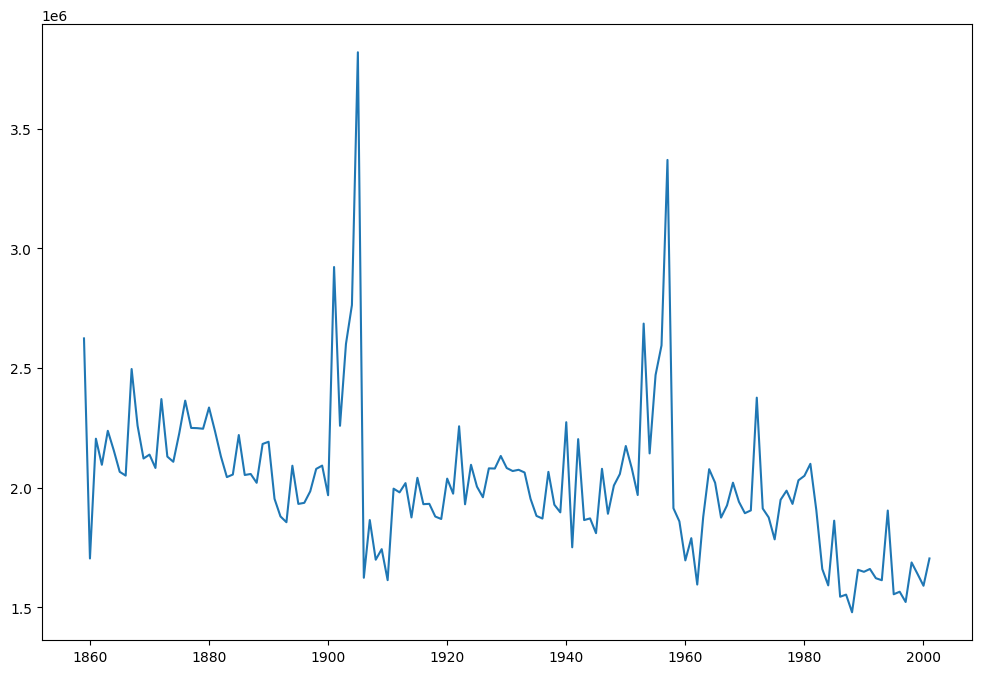

In [8]:
df['y'].plot(figsize=(12,8))

In [9]:
df.head()

,ds,y
1859,2010-02-05,2623469.95
1860,2010-02-12,1704218.84
1861,2010-02-19,2204556.70
1862,2010-02-26,2095591.63
1863,2010-03-05,2237544.75


In [10]:
df.tail()

,ds,y
1997,2012-09-28,1522512.20
1998,2012-10-05,1687592.16
1999,2012-10-12,1639585.61
2000,2012-10-19,1590274.72
2001,2012-10-26,1704357.62


In [11]:
cutoff_date = "2012-04-01"

# Create Train-Test Split
train = df[df['ds'] < cutoff_date]
test = df[df['ds'] >= cutoff_date]

In [12]:
from prophet import Prophet
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.add_seasonality(name='yearly', period=365.25, fourier_order=8)

m.fit(train)
future=m.make_future_dataframe(periods=30, freq='W')
forecast=m.predict(future)

09:36:30 - cmdstanpy - INFO - Chain [1] start processing
09:36:30 - cmdstanpy - INFO - Chain [1] done processing


<Axes: title={'center': 'Training Data Trend'}, xlabel='ds'>

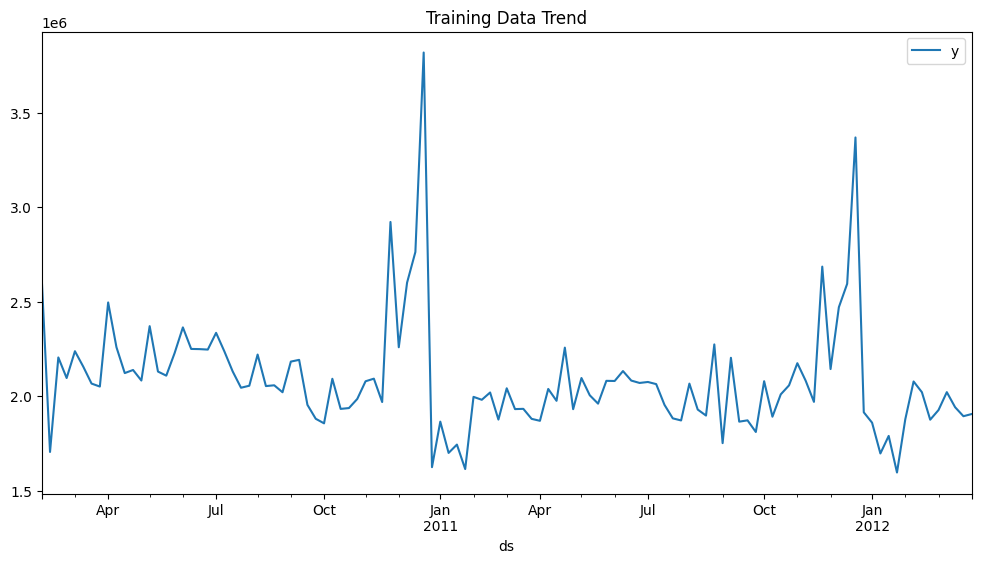

In [13]:
train.plot(x='ds', y='y', figsize=(12,6), title="Training Data Trend")


In [14]:
train.tail()

,ds,y
1967,2012-03-02,1926004.99
1968,2012-03-09,2020839.31
1969,2012-03-16,1941040.50
1970,2012-03-23,1893447.71
1971,2012-03-30,1905033.01


In [15]:
test.shape

(30, 2)

In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'yhat'],
      dtype='object')

In [17]:
test.head()

,ds,y
1972,2012-04-06,2376022.26
1973,2012-04-13,1912909.69
1974,2012-04-20,1875686.44
1975,2012-04-27,1784029.95
1976,2012-05-04,1949354.29


In [18]:
test.tail()

,ds,y
1997,2012-09-28,1522512.20
1998,2012-10-05,1687592.16
1999,2012-10-12,1639585.61
2000,2012-10-19,1590274.72
2001,2012-10-26,1704357.62


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
138,2012-09-23,2.158541e+06,1.777702e+06,2.335430e+06,2.157926e+06,2.159209e+06,-0.048175,-0.048175,-0.048175,0.017891,0.017891,0.017891,-0.066067,-0.066067,-0.066067,0.0,0.0,0.0,2.054552e+06
139,2012-09-30,2.156250e+06,1.735550e+06,2.269491e+06,2.155610e+06,2.156952e+06,-0.069124,-0.069124,-0.069124,0.017891,0.017891,0.017891,-0.087015,-0.087015,-0.087015,0.0,0.0,0.0,2.007202e+06
140,2012-10-07,2.153960e+06,1.731375e+06,2.264209e+06,2.153287e+06,2.154688e+06,-0.066639,-0.066639,-0.066639,0.017891,0.017891,0.017891,-0.084530,-0.084530,-0.084530,0.0,0.0,0.0,2.010422e+06
141,2012-10-14,2.151670e+06,1.788248e+06,2.335472e+06,2.150949e+06,2.152446e+06,-0.039012,-0.039012,-0.039012,0.017891,0.017891,0.017891,-0.056904,-0.056904,-0.056904,0.0,0.0,0.0,2.067728e+06
142,2012-10-21,2.149379e+06,1.872637e+06,2.415254e+06,2.148633e+06,2.150204e+06,-0.002637,-0.002637,-0.002637,0.017891,0.017891,0.017891,-0.020528,-0.020528,-0.020528,0.0,0.0,0.0,2.143712e+06


<Axes: xlabel='ds'>

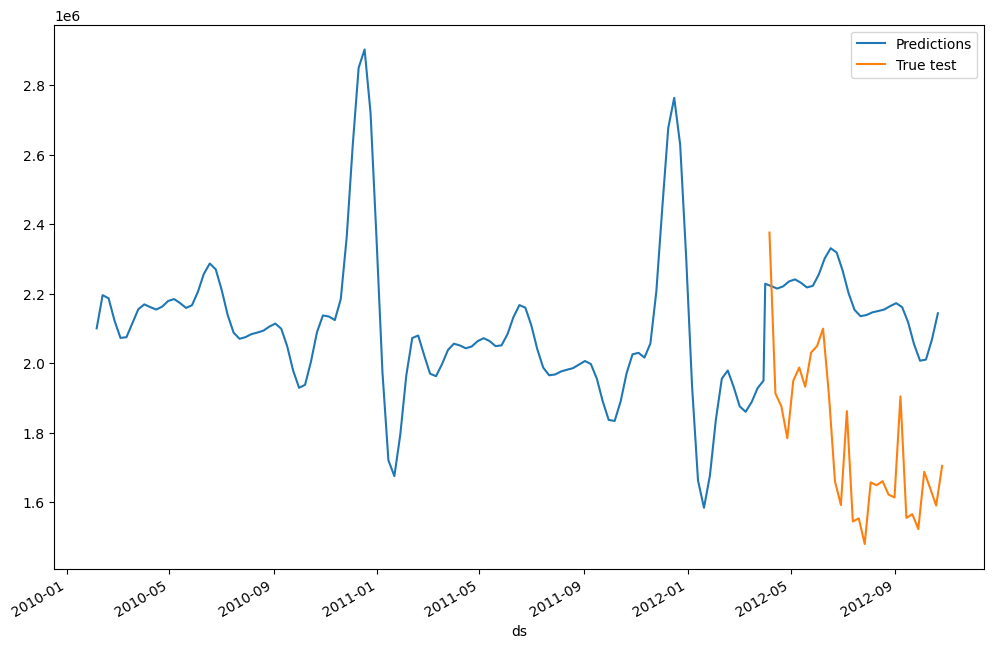

In [20]:
ax=forecast.plot(x='ds',y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y',label='True test', legend=True, ax=ax) 


In [21]:
print(test['y'].shape)
print(forecast['yhat'].shape)


(30,)
(143,)


In [22]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast[forecast['ds'] >= cutoff_date]['yhat'].reset_index(drop=True)
actuals = test['y'].reset_index(drop=True)
if predictions.shape[0] == actuals.shape[0]:
    error = rmse(predictions, actuals)
    print(f'RMSE: {error}')
else:
    print(f'Shape mismatch: predictions shape {predictions.shape}, actuals shape {actuals.shape}')






RMSE: 457036.3866569198


In [23]:
nrmse=rmse(predictions, test['y'])/test['y'].mean()
nrmse

0.25887125251764787

In [24]:
accuracy=1-nrmse
accuracy

0.7411287474823521

In [25]:
from prophet.diagnostics import cross_validation, performance_metrics


In [26]:
from prophet.plot import plot_cross_validation_metric 

In [27]:
df_cv = cross_validation(m, 
                         initial='365 days',  # Initial training period
                         period='365 days',   # Frequency of fold creation
                         horizon='365 days',   # Forecast horizon # Speeds up computation
                        )

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/1 [00:00<?, ?it/s]

09:36:32 - cmdstanpy - INFO - Chain [1] start processing
09:36:32 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\sivap\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\sivap\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


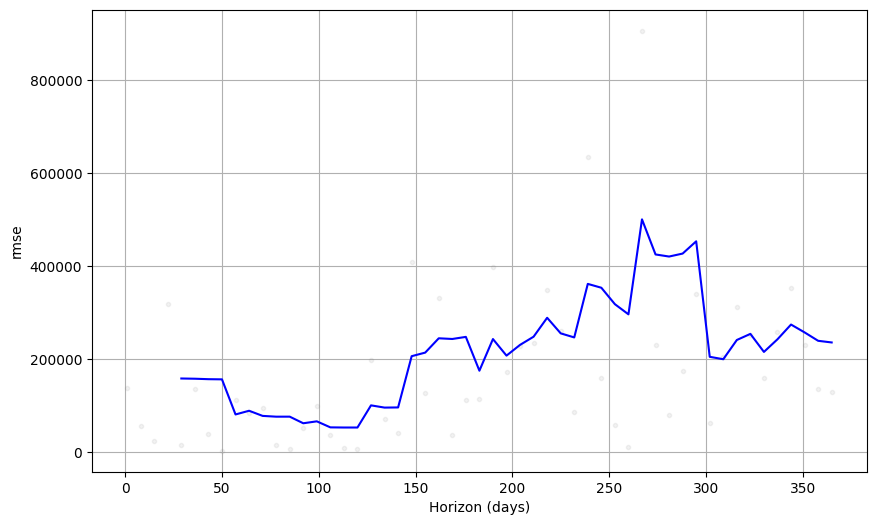

In [28]:
performance_metrics(df_cv)
plot_cross_validation_metric(df_cv,metric='rmse');

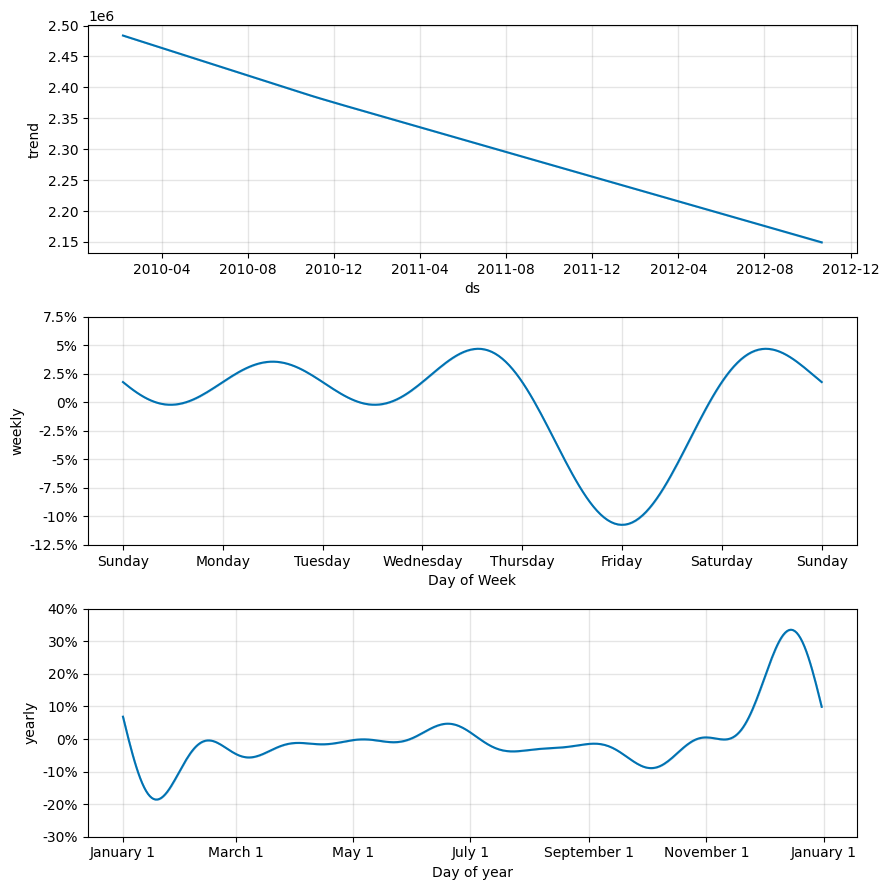

In [29]:
fig=m.plot_components(forecast)